In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [3]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [4]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [5]:
data = pd.read_csv('fake3-1.csv')

In [6]:
df = data.filter(['Timestamp','Water'], axis=1)

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [8]:
df.isna().sum()

df = df.dropna()
df.isnull().sum()

df = df.set_index('Timestamp')

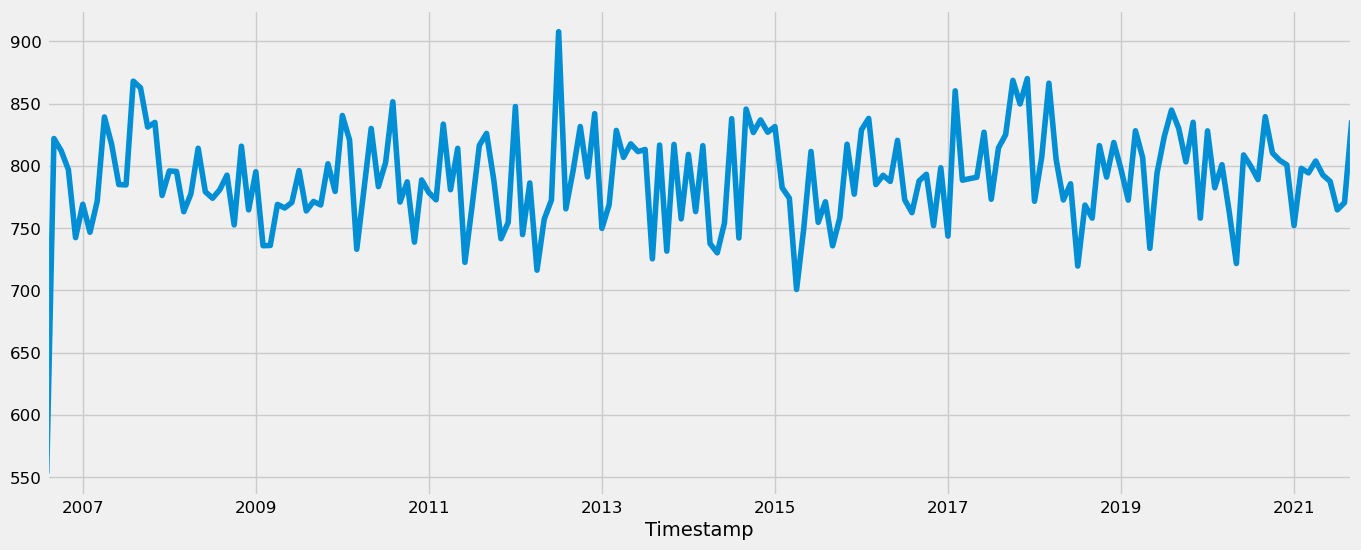

In [9]:
df1 = df['Water'].resample('MS').mean()
df1.plot(figsize = (15, 6))
plt.show()

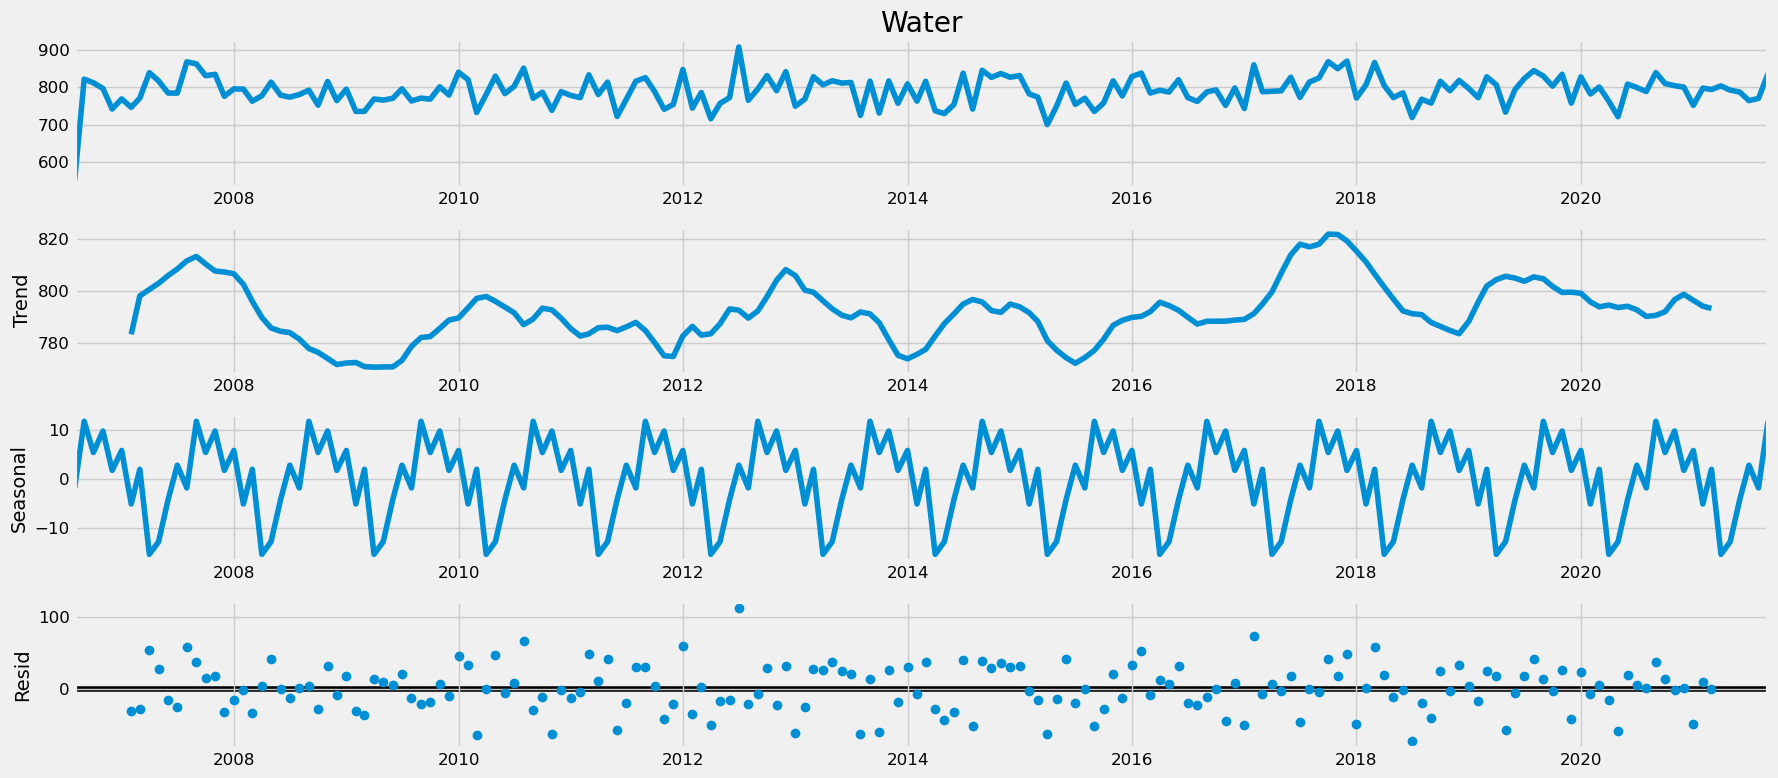

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(df1))
print(kpss_test(df))

Results of Dickey-Fuller Test:
Test Statistic                -8.437729e+00
p-value                        1.797666e-13
#Lags Used                     1.000000e+00
Number of Observations Used    1.800000e+02
Critical Value (1%)           -3.467211e+00
Critical Value (5%)           -2.877735e+00
Critical Value (10%)          -2.575403e+00
dtype: float64
None
Results of KPSS Test:
Test Statistic            0.164901
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


/home/sharon/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


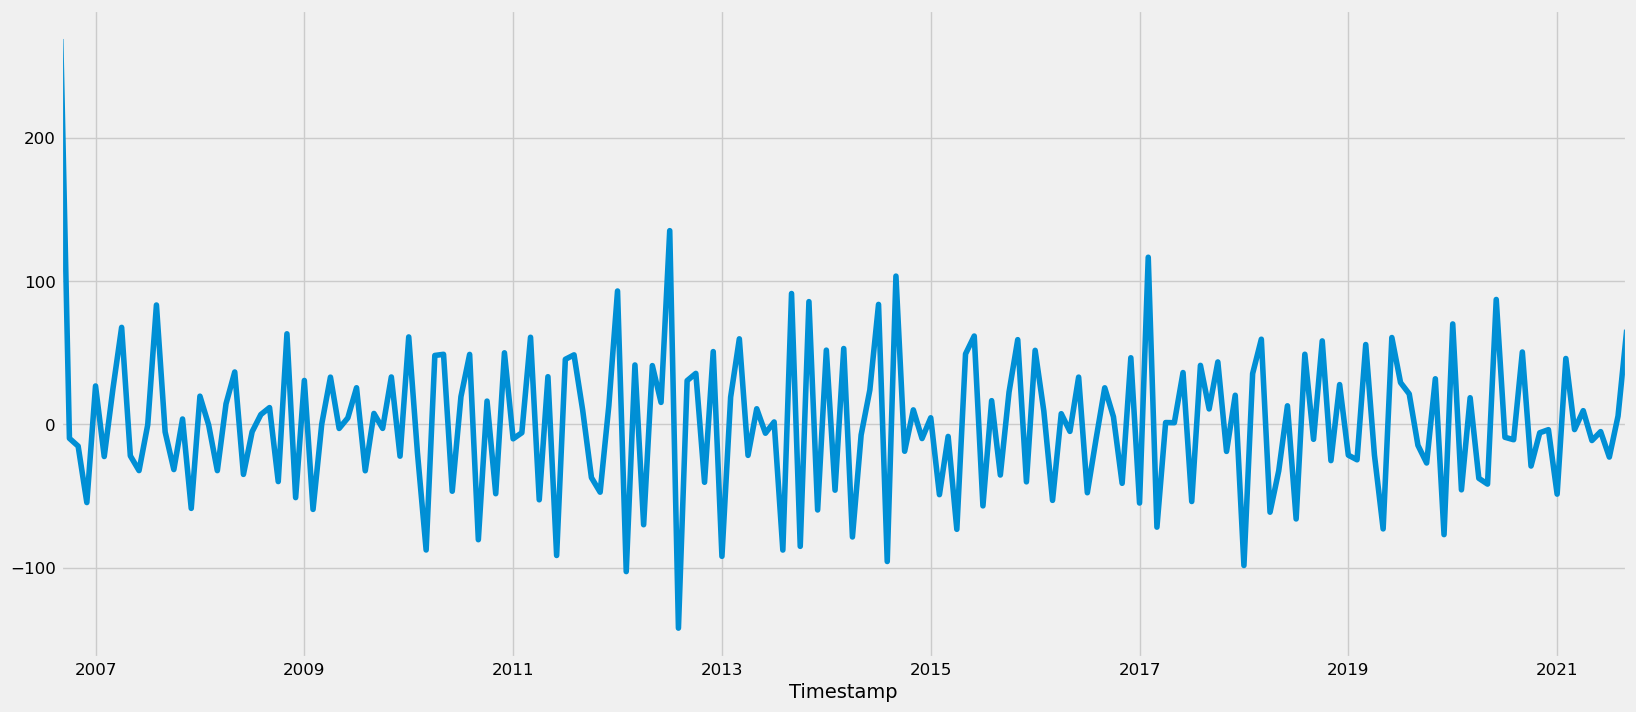

In [12]:
df2 = df1 - df1.shift(1)
df2 = df2.dropna()

df2.plot()
plt.show()

# print(adf_test(df1))

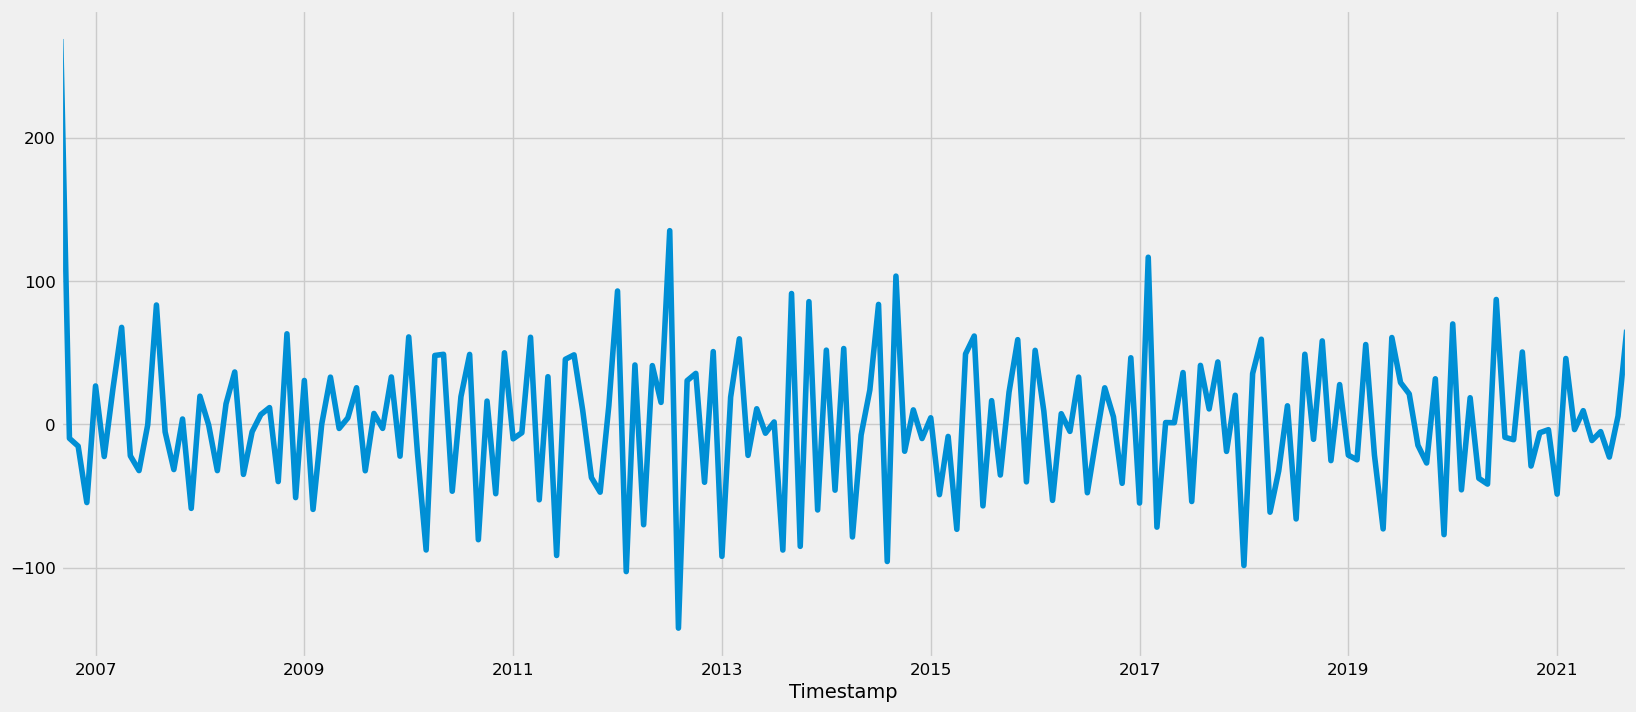

In [13]:
df3 = df2 - df2.shift(12)
df3 =df2.dropna()

df3.plot()
plt.show()

In [14]:
test_result=adfuller(df3)

In [15]:
def adfuller_test(df3):
    result=adfuller(df3)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(df3)

ADF Test Statistic : -6.524230220179658
p-value : 1.0241091469047624e-08
#Lags Used : 14
Number of Observations Used : 166
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


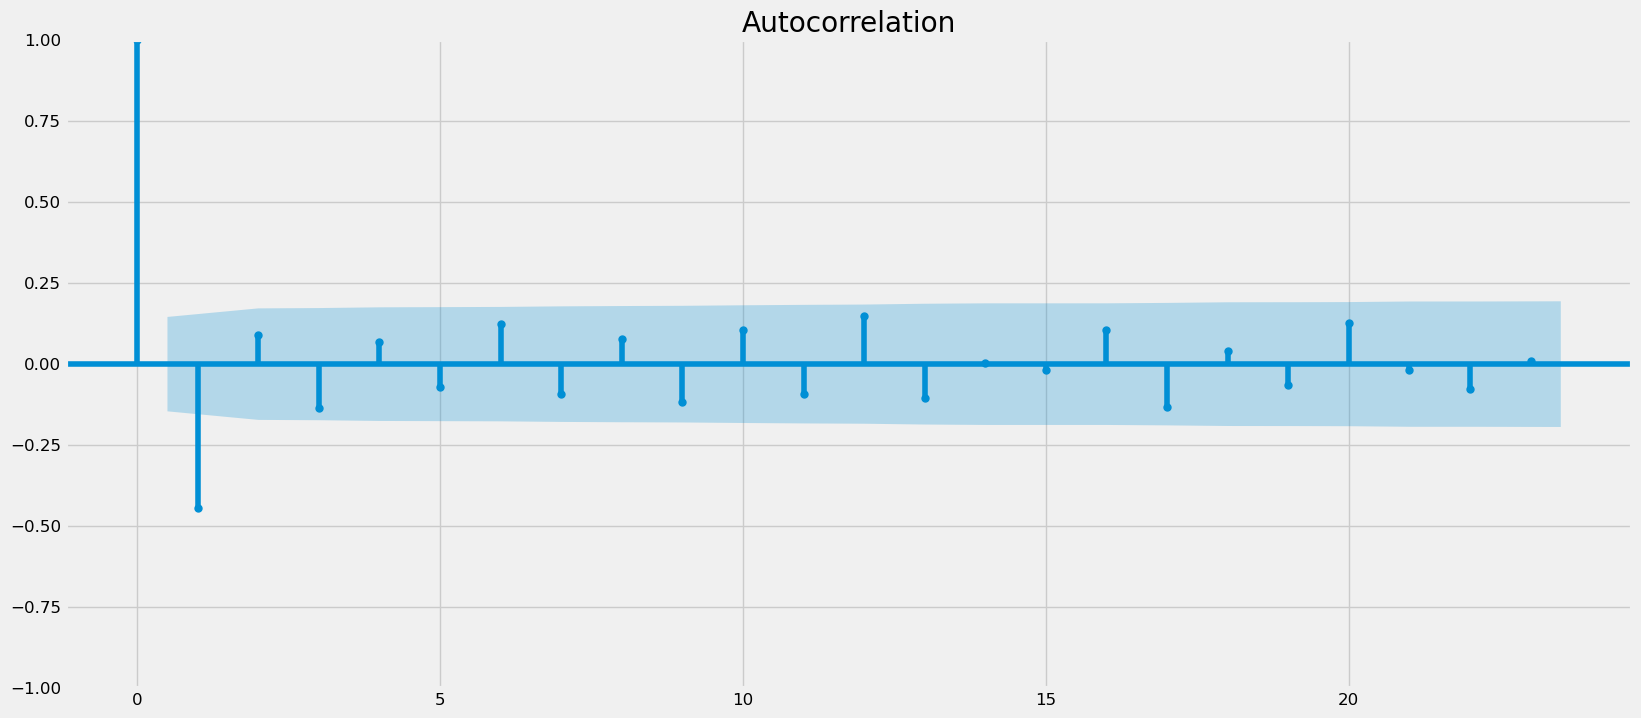

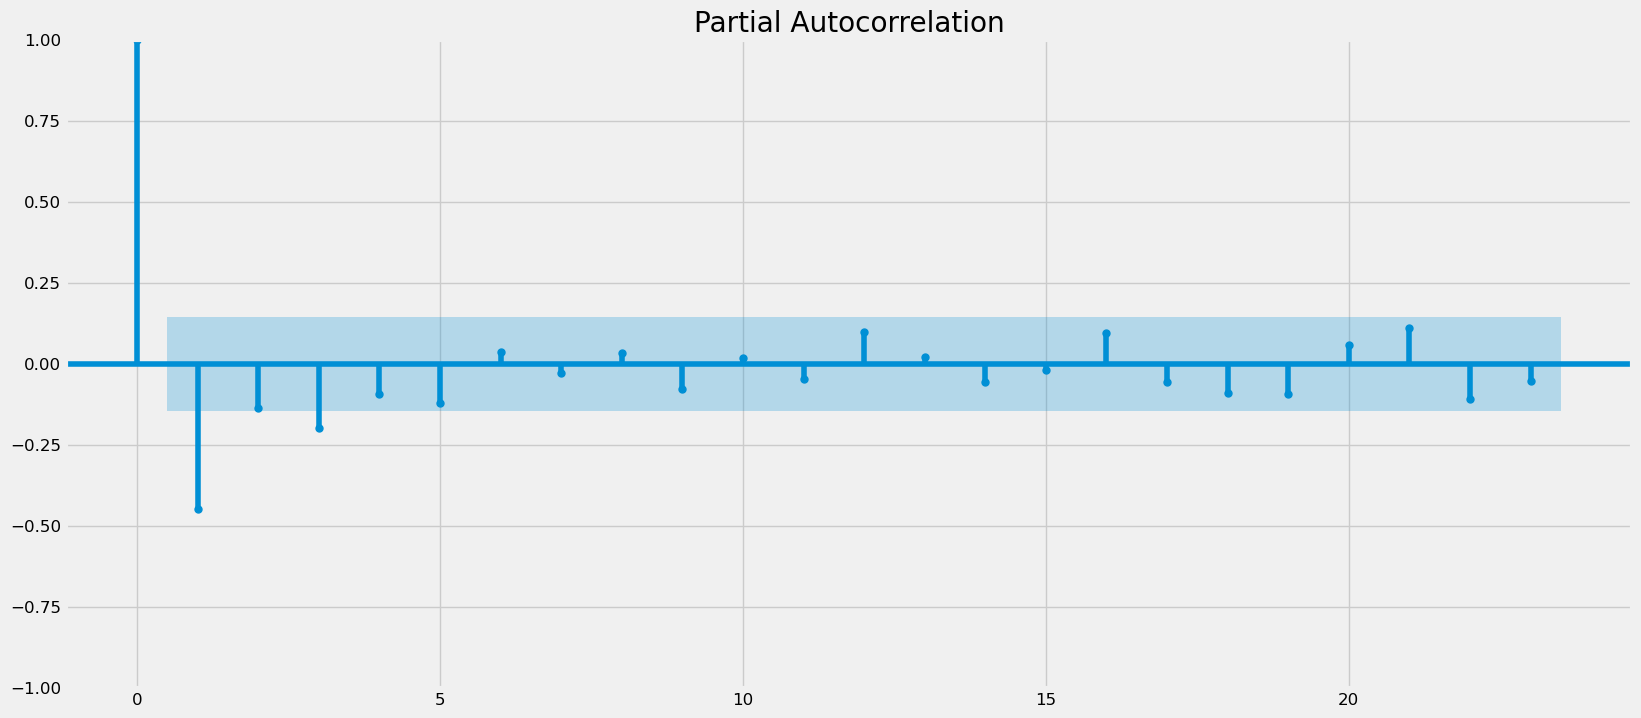

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df3)
matplotlib.pyplot.show()
plot_pacf(df3)
matplotlib.pyplot.show()

In [18]:
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


Optimization terminated successfully.
         Current function value: 5.676098
         Iterations: 2
         Function evaluations: 41
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2056.7473732341914
Optimization terminated successfully.
         Current function value: 5.543276
         Iterations: 3
         Function evaluations: 80
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2010.6658163103891
Optimization terminated successfully.
         Current function value: 5.532174
         Iterations: 3
         Function evaluations: 114
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:2008.6469862880658
Optimization terminated successfully.
         Current function value: 5.590929
         Iterations: 1
         Function evaluations: 23
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2027.916198213509
Optimization terminated successfully.
         Current function value: 5.527778
         Iterations: 6
         Function evaluations: 226
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2007.0554717553864
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 4.971095
         Iterations: 8
         Function evaluations: 640
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:1811.536365281872
Optimization terminated successfully.
         Current function value: 4.971533
         Iterations: 5
         Function evaluations: 496
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:1813.6948001642472
Optimization terminated successfully.
         Current function value: 5.071182
         Iterations: 6
         Function evaluations: 391
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:1843.7678348926956
Optimization terminated successfully.
         Current function value: 4.888954
         Iterations: 9
         Function evaluations: 552
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1779.801452090322
Optimization terminated successfully.
         Current function value: 4.888894
         Iterations: 11
         Function evaluations: 846
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:1781.7796575451023
Optimization terminated success

In [47]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(df3,
                                order=(0, 1, 2),
                                seasonal_order=(1, 1, 1, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])


Optimization terminated successfully.
         Current function value: 4.891517
         Iterations: 4
         Function evaluations: 306
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9993      0.121    -16.551      0.000      -2.236      -1.763
ma.L2          1.0000      0.121      8.249      0.000       0.762       1.238
ar.S.L12      -0.0318      0.133     -0.240      0.810      -0.292       0.228
ma.S.L12      -0.8509      0.122     -6.968      0.000      -1.090      -0.612
sigma2      1765.0234      0.000   1.29e+07      0.000    1765.023    1765.024


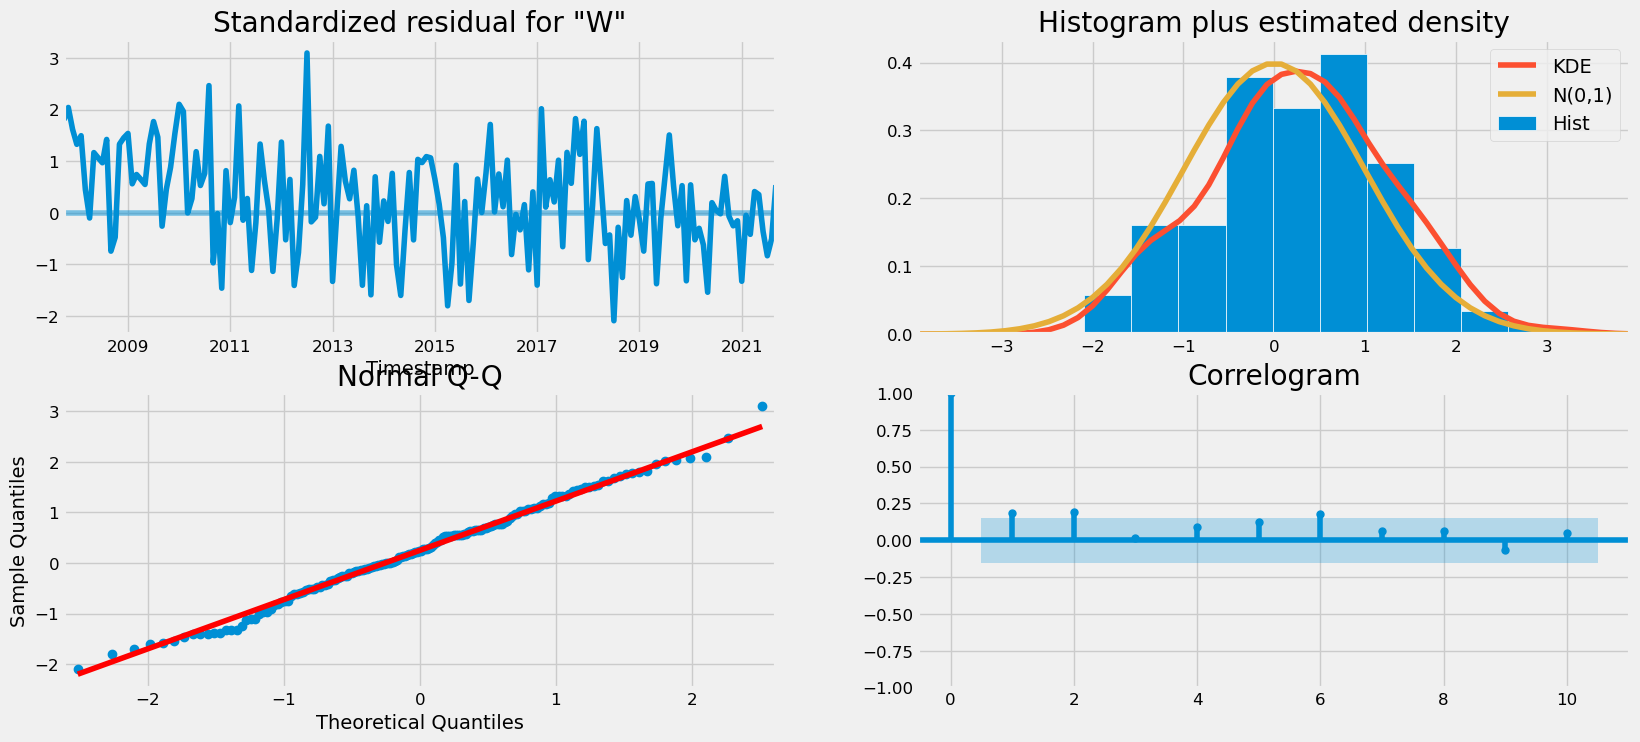

In [48]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

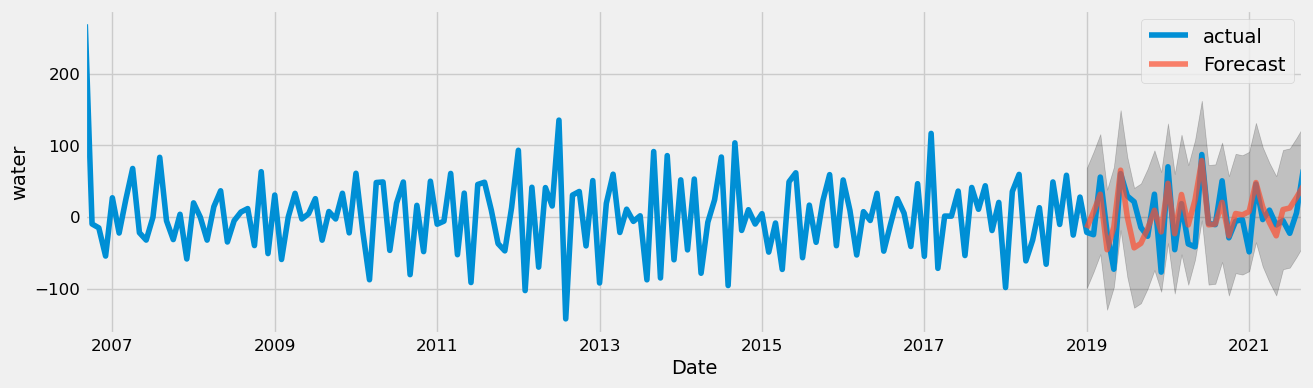

In [49]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df3.plot(label='actual')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('water')
plt.legend()
plt.show()


### To evaluate the model performance, we use Root Mean Squared Error (RMSE)

In [50]:
y_forecasted = pred.predicted_mean
y_truth = df3['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error is 873.14
The Root Mean Squared Error is 29.55


In [54]:
#Part IV: Forecasting
#Of course, Python can help us to forecast values even if you don't write the equation.

#If forecast one day ahead
print(results.forecast(1))

#If forecast two days ahead
print(results.forecast(10))

2021-10-01   -24.153339
Freq: MS, dtype: float64
2021-10-01   -24.153339
2021-11-01     2.016952
2021-12-01    -9.435395
2022-01-01    -2.674468
2022-02-01    -2.058079
2022-03-01    10.390317
2022-04-01   -21.566069
2022-05-01   -10.459427
2022-06-01    23.360704
2022-07-01    -5.240675
Freq: MS, Name: predicted_mean, dtype: float64
